# Capstone Project 

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


### Libraries

In [47]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

### Load data

In [39]:

  
# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 
  
# metadata 
# print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(phiusiil_phishing_url_website.variables) 


                          name     role         type demographic description  \
0                     FILENAME    Other  Categorical        None        None   
1                          URL  Feature  Categorical        None        None   
2                    URLLength  Feature      Integer        None        None   
3                       Domain  Feature  Categorical        None        None   
4                 DomainLength  Feature      Integer        None        None   
5                   IsDomainIP  Feature      Integer        None        None   
6                          TLD  Feature  Categorical        None        None   
7           URLSimilarityIndex  Feature      Integer        None        None   
8         CharContinuationRate  Feature      Integer        None        None   
9            TLDLegitimateProb  Feature   Continuous        None        None   
10                 URLCharProb  Feature   Continuous        None        None   
11                   TLDLength  Feature 

#### Data Explorations

In [7]:
X.shape

(235795, 54)

In [11]:
y.shape

(235795, 1)

In [13]:
X.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [15]:
y.head()

,label
0,1
1,1
2,1
3,1
4,1


In [23]:
X.dtypes

URL                            object
URLLength                       int64
Domain                         object
DomainLength                    int64
IsDomainIP                      int64
TLD                            object
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
LineOfCode                      int64
LargestLineL

In [25]:
X.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

In [73]:
y.isnull().sum()

label    0
dtype: int64

In [35]:
X.duplicated().sum()

0

In [43]:
X.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


In [45]:
y.describe()

,label
count,235795.000000
mean,0.571895
std,0.494805
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [52]:
X.select_dtypes(include=['number']).skew().sort_values(ascending=True)


HasTitle                       -2.090195
IsHTTPS                        -1.370443
CharContinuationRate           -1.128591
URLCharProb                    -1.064291
URLSimilarityIndex             -0.989903
IsResponsive                   -0.514255
URLTitleMatchScore             -0.089085
LetterRatioInURL               -0.066358
DomainTitleMatchScore          -0.008735
HasCopyrightInfo                0.052921
TLDLegitimateProb               0.073090
HasSocialNet                    0.174379
HasDescription                  0.241000
HasSubmitButton                 0.347949
HasHiddenFields                 0.504096
HasFavicon                      0.575358
Robots                          1.056024
SpacialCharRatioInURL           1.184134
Pay                             1.236906
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfURLRedirect                 2.155960
Bank                            2.239229
DomainLength                    2.513397
HasPasswordField

In [54]:
y.select_dtypes(include=['number']).skew().sort_values(ascending=True)


label   -0.290602
dtype: float64

### Boxplot for outlier detection

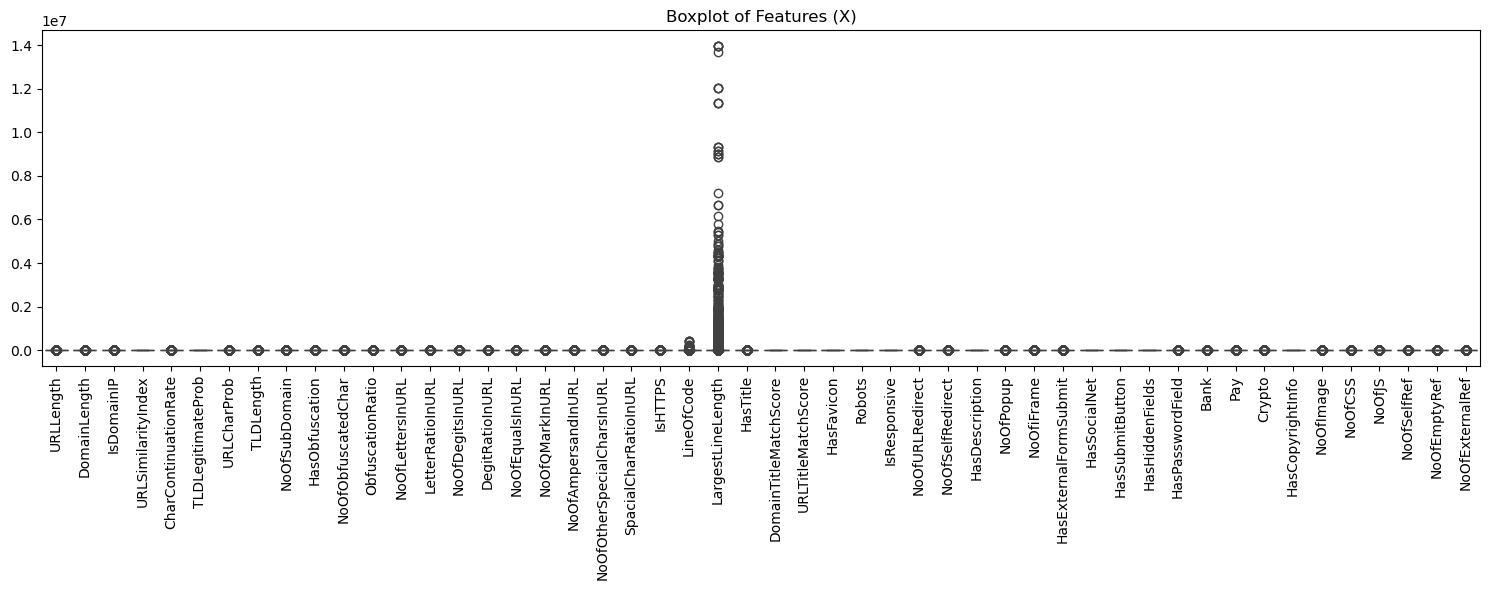

In [68]:

# Select only numeric columns from X
X_numeric = X.select_dtypes(include=['number'])


plt.figure(figsize=(15, 6))

# Boxplot for independent variables (X)
 
sns.boxplot(data=X_numeric)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Boxplot of Features (X)")

plt.tight_layout()  
plt.show()


In [81]:
# check for imbalance in target variable

# Check class distribution
print(y.value_counts())

# Check class distribution in percentage
print(y.value_counts(normalize=True) * 100)


label
1        134850
0        100945
Name: count, dtype: int64
label
1        57.189508
0        42.810492
Name: proportion, dtype: float64
